# HW 4 Part 1 By Khyati Sharma

#***Puzzle 1 Part 1***

In [200]:
# Importing the os module to confirm current working directory
import os
print(os.getcwd())

C:\Users\sharm


***Now, getting the list of depth numbers (readings from the sonar device) that are stored in the input file***

In [223]:
# Read all lines from the file into a list of strings
with open("input.txt") as file:
    data = file.readlines()

# Convert each line (string) into an integer after stripping whitespace/newline
depths = [int(line.strip()) for line in data]

# Step 3: Print only the first and last few values
print("First 10 values:", depths[:10])
print("Last 10 values:", depths[-10:])

First 10 values: [173, 178, 179, 187, 196, 199, 200, 201, 210, 209]
Last 10 values: [9253, 9261, 9263, 9262, 9260, 9267, 9274, 9279, 9298, 9299]


In [205]:
# Counting how many depth measurements are there in the input file to get a sense of the data size
print("Total number of values:", count)

Total number of values: 2000


***STRATEGY - Will go through the list of depth numbers one by one, starting from the second number. For each number, will check if it is greater than the number before it. If it is, will count it as an increase.***

In [208]:
# Counting how many times the depth increases compared to the previous depth
increase_count = 0
for i in range(1, len(depths)):
    if depths[i] > depths[i - 1]:
        increase_count += 1
        
# Solution of Part 1 of the puzzle
print("Number of increases:", increase_count)

Number of increases: 1688


#***Puzzle 1 Part 2***

***For each group of 3 consecutive depth values, add them together and store the sum***

In [229]:
# Creating sums of each sliding window of size 3
window_sums = []
for i in range(len(depths) - 2):  # -2 to avoid index out of range
    sum_of_window = depths[i] + depths[i+1] + depths[i+2]
    window_sums.append(sum_of_window)

# Print first few sums and total count to get an overview
print("First 20 sliding window sums:", window_sums[:20])
print("Total number of window sums:", len(window_sums))

First 20 sliding window sums: [530, 544, 562, 582, 595, 600, 611, 620, 629, 630, 642, 655, 679, 694, 708, 711, 717, 729, 738, 742]
Total number of window sums: 1998


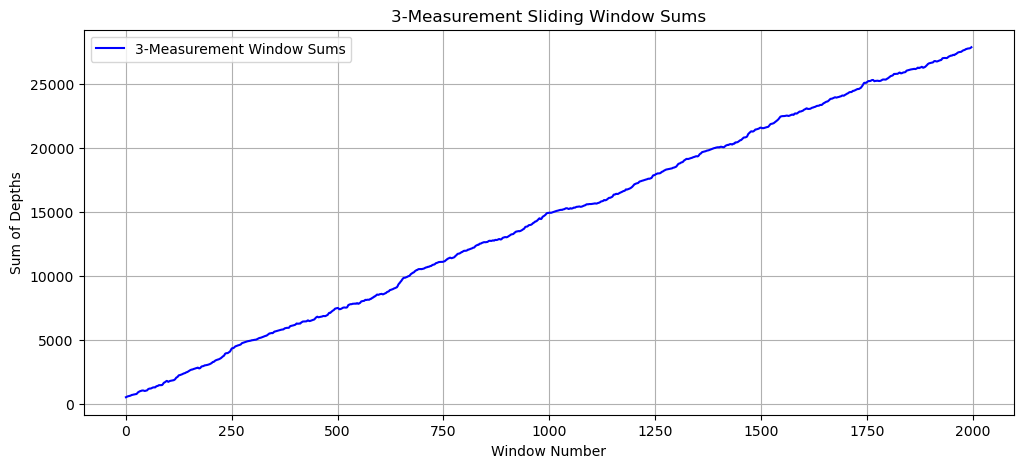

In [231]:
# Plotting the window sums to understand them visually
plt.figure(figsize=(12, 5))
plt.plot(window_sums, label="3-Measurement Window Sums", color='blue')
plt.title("3-Measurement Sliding Window Sums")
plt.xlabel("Window Number")
plt.ylabel("Sum of Depths")
plt.legend()
plt.grid(True)
plt.show()

*The graph above shows how the sum of three consecutive depth values changes as the submarine moves forward. The x-axis represents the window number (each group of three measurements), and the y-axis represents the sum of those three depths. The steadily rising blue line indicates that the depth is generally increasing over time, with only a few minor drops.*

***Strategy – Add up depth values using a 3-number sliding window. Compare each sum with the previous one. If the current sum is larger, count it as an increase. At the end, show how many sums increased.***

In [235]:
# Count how many times the window sum increases from the previous sum
increase_count = 0
for i in range(1, len(window_sums)):
    if window_sums[i] > window_sums[i - 1]:
        increase_count += 1
        
#  Solution for Part 2 of the Puzzle
print("Number of sliding window increases:", increase_count)

Number of sliding window increases: 1728


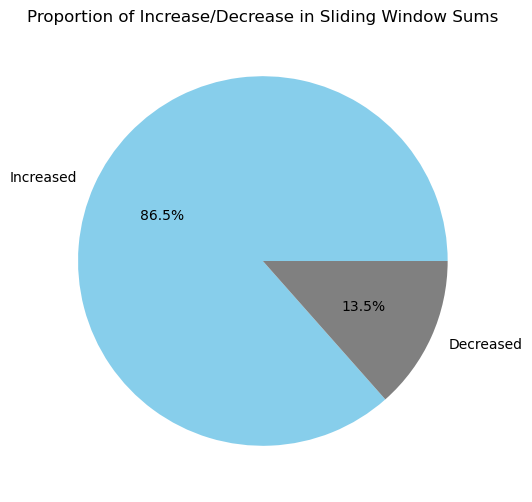

In [237]:
# Visualize increase vs. decrease as a pie chart
num_increases = sum(1 for i in range(1, len(window_sums)) if window_sums[i] > window_sums[i-1])
num_total = len(window_sums) - 1
num_decreases = num_total - num_increases

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([num_increases, num_decreases],
        labels=["Increased", "Decreased"],
        autopct='%1.1f%%',
        colors=['skyblue', 'gray'])
plt.title("Proportion of Increase/Decrease in Sliding Window Sums")
plt.show()

*Out of 1998 total sliding window sums, 1728 showed an increase compared to the previous sum. This means that approximately 86.5% of the time, the sum of three consecutive depth measurements increased as the submarine moved forward. This high percentage indicates a consistent deepening of the ocean floor, with only 270 instances (13.5%) where the depth  decreased.*